In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


#### Import dat o návštěvnosti cyklostezky Brno-Vídeň

In [2]:
bvu = pd.read_csv("brno_viden-union.csv", parse_dates=['datum'], encoding="utf-8") 
bvu

,nazev_citace,lat,lon,id_citace,datum,Total,TotalIN,TotalOUT,PesiTotal,PesiIN,PesiOUT,CykloTotal,CykloIN,CykloOUT,AutaTotal,AutaIN,AutaOUT,AutobusyTotal,AutobusyIN,AutobusyOUT
0,Pasohlávky,48.90032,16.53379,69884,2016-01-01,79,39,40,69,35,34,10,4,6,0,0,0,0,0,0
1,Pasohlávky,48.90032,16.53379,69884,2016-01-02,33,16,17,30,15,15,3,1,2,0,0,0,0,0,0
2,Pasohlávky,48.90032,16.53379,69884,2016-01-03,20,11,9,17,9,8,3,2,1,0,0,0,0,0,0
3,Pasohlávky,48.90032,16.53379,69884,2016-01-04,2,1,1,0,0,0,2,1,1,0,0,0,0,0,0
4,Pasohlávky,48.90032,16.53379,69884,2016-01-05,2,1,1,0,0,0,2,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Židlochovice,49.03288,16.61895,69878,2020-06-26,551,419,132,123,65,58,428,354,74,0,0,0,0,0,0
9854,Židlochovice,49.03288,16.61895,69878,2020-06-27,1408,1002,406,117,62,55,1291,940,351,0,0,0,0,0,0
9855,Židlochovice,49.03288,16.61895,69878,2020-06-28,1334,961,373,178,117,61,1156,844,312,0,0,0,0,0,0
9856,Židlochovice,49.03288,16.61895,69878,2020-06-29,294,117,177,104,37,67,190,80,110,0,0,0,0,0,0


#### Import dat o návštěvnosti Labské cyklostezky


In [3]:
lc = pd.read_csv("labska_stezka_union.csv", parse_dates=['datum'], encoding="utf-8") 
lc

,nazev_citace,lat,lon,id_citace,datum,Total,TotalIN,TotalOUT,PesiTotal,PesiIN,PesiOUT,CykloTotal,CykloIN,CykloOUT,AutaTotal,AutaIN,AutaOUT,AutobusyTotal,AutobusyIN,AutobusyOUT
0,Poděbrady,50.160650,15.098920,135761,2019-05-01,1138,579,548,448,235,213,679,344,335,11,0,0,0,0,0
1,Poděbrady,50.160650,15.098920,135761,2019-05-02,838,428,405,308,171,137,525,257,268,5,0,0,0,0,0
2,Poděbrady,50.160650,15.098920,135761,2019-05-03,428,199,229,121,65,56,307,134,173,0,0,0,0,0,0
3,Poděbrady,50.160650,15.098920,135761,2019-05-04,660,371,280,206,122,84,445,249,196,9,0,0,0,0,0
4,Poděbrady,50.160650,15.098920,135761,2019-05-05,517,284,232,206,106,100,310,178,132,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11953,Dolní Beřkovice,50.397134,14.446034,92236,2020-06-26,472,243,229,107,65,42,365,178,187,0,0,0,0,0,0
11954,Dolní Beřkovice,50.397134,14.446034,92236,2020-06-27,1062,604,458,142,75,67,920,529,391,0,0,0,0,0,0
11955,Dolní Beřkovice,50.397134,14.446034,92236,2020-06-28,830,419,411,171,89,82,659,330,329,0,0,0,0,0,0
11956,Dolní Beřkovice,50.397134,14.446034,92236,2020-06-29,358,192,166,81,45,36,277,147,130,0,0,0,0,0,0


#### Import dat o počasí 2016-2020

In [4]:
pocasi = pd.read_csv("pocasi_2016-2020.csv", parse_dates=['datum'], encoding="utf-8")
pocasi

,datum,id_stanice,max_teplota,srazky,naraz_vetru
0,2016-01-01,brno,-1.5,1.7,NaN
1,2016-01-01,brno_zabovresky,-0.4,0.9,NaN
2,2016-01-01,brod_nad_dyji,-0.6,0.0,NaN
3,2016-01-01,bzenec,NaN,2.5,NaN
4,2016-01-01,dyjakovice,0.4,0.0,NaN
...,...,...,...,...,...
221614,2020-06-30,roudnice,26.0,NaN,NaN
221615,2020-06-30,strelna,23.8,0.0,NaN
221616,2020-06-30,vernerice,25.2,0.0,NaN
221617,2020-06-30,vysluni,19.9,0.0,NaN


#### Import tabulky ke spojení dat o návštěvnosti a o počasí

In [5]:
bridge = pd.read_csv("meteo_stanice_bridge.csv", encoding="utf-8")
bridge

,nazev_citace,nazev_stanice,id_stanice
0,Děčín - Křešice,Děčín,decin
1,Velké Březno,Ústí nad Labem - Kočkov,usti_nad_labem
2,Roudnice nad Labem,Doksany,doksany
3,Dolní Beřkovice,Velký Borek,velky_borek
4,Poděbrady,Šlotava,slotava
5,Vysoká nad Labem,Hradec Králové,hradec
6,Věkoše,Hradec Králové,hradec
7,Smiřice,Hradec Králové,hradec
8,Kuks,Vítězná,vitezna
9,Přízřenice,Brno - Tuřany,brno


#### Spojení dat o návštěvnosti cyklostezky Brno-Vídeň s propojovací tabulkou

In [6]:
spojeni_bvu = pd.merge(bvu, bridge, on="nazev_citace")
spojeni_bvu

,nazev_citace,lat,lon,id_citace,datum,Total,TotalIN,TotalOUT,PesiTotal,PesiIN,...,CykloIN,CykloOUT,AutaTotal,AutaIN,AutaOUT,AutobusyTotal,AutobusyIN,AutobusyOUT,nazev_stanice,id_stanice
0,Pasohlávky,48.90032,16.53379,69884,2016-01-01,79,39,40,69,35,...,4,6,0,0,0,0,0,0,Němčičky,nemcicky
1,Pasohlávky,48.90032,16.53379,69884,2016-01-02,33,16,17,30,15,...,1,2,0,0,0,0,0,0,Němčičky,nemcicky
2,Pasohlávky,48.90032,16.53379,69884,2016-01-03,20,11,9,17,9,...,2,1,0,0,0,0,0,0,Němčičky,nemcicky
3,Pasohlávky,48.90032,16.53379,69884,2016-01-04,2,1,1,0,0,...,1,1,0,0,0,0,0,0,Němčičky,nemcicky
4,Pasohlávky,48.90032,16.53379,69884,2016-01-05,2,1,1,0,0,...,1,1,0,0,0,0,0,0,Němčičky,nemcicky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Židlochovice,49.03288,16.61895,69878,2020-06-26,551,419,132,123,65,...,354,74,0,0,0,0,0,0,Holasice,holasice
9854,Židlochovice,49.03288,16.61895,69878,2020-06-27,1408,1002,406,117,62,...,940,351,0,0,0,0,0,0,Holasice,holasice
9855,Židlochovice,49.03288,16.61895,69878,2020-06-28,1334,961,373,178,117,...,844,312,0,0,0,0,0,0,Holasice,holasice
9856,Židlochovice,49.03288,16.61895,69878,2020-06-29,294,117,177,104,37,...,80,110,0,0,0,0,0,0,Holasice,holasice


#### Spojení dat o návštěvnosti cyklostezky Brno-Vídeň s počasím

In [7]:
dataset_bvu = pd.merge(spojeni_bvu, pocasi, on=['datum', 'id_stanice'])
dataset_bvu

,nazev_citace,lat,lon,id_citace,datum,Total,TotalIN,TotalOUT,PesiTotal,PesiIN,...,AutaIN,AutaOUT,AutobusyTotal,AutobusyIN,AutobusyOUT,nazev_stanice,id_stanice,max_teplota,srazky,naraz_vetru
0,Pasohlávky,48.90032,16.53379,69884,2016-01-01,79,39,40,69,35,...,0,0,0,0,0,Němčičky,nemcicky,-1.3,0.9,NaN
1,Vranovice,48.96595,16.58394,69887,2016-01-01,42,21,21,39,19,...,0,0,0,0,0,Němčičky,nemcicky,-1.3,0.9,NaN
2,Pasohlávky,48.90032,16.53379,69884,2016-01-02,33,16,17,30,15,...,0,0,0,0,0,Němčičky,nemcicky,8.3,1.8,NaN
3,Vranovice,48.96595,16.58394,69887,2016-01-02,33,20,13,27,17,...,0,0,0,0,0,Němčičky,nemcicky,8.3,1.8,NaN
4,Pasohlávky,48.90032,16.53379,69884,2016-01-03,20,11,9,17,9,...,0,0,0,0,0,Němčičky,nemcicky,4.6,4.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9531,Přízřenice,49.14063,16.62824,69885,2020-06-26,463,363,100,58,43,...,0,0,0,0,0,Brno - Tuřany,brno,25.4,8.4,NaN
9532,Přízřenice,49.14063,16.62824,69885,2020-06-27,1721,1268,453,196,145,...,0,0,0,0,0,Brno - Tuřany,brno,28.1,0.0,NaN
9533,Přízřenice,49.14063,16.62824,69885,2020-06-28,1601,1187,414,178,129,...,0,0,0,0,0,Brno - Tuřany,brno,29.8,2.0,63.0
9534,Přízřenice,49.14063,16.62824,69885,2020-06-29,193,148,45,25,17,...,0,0,0,0,0,Brno - Tuřany,brno,20.9,11.3,NaN


#### Spojení dat o návštěvnosti Labské cyklostezky s propojovací tabulkou

In [8]:
spojeni_lc = pd.merge(lc, bridge, on="nazev_citace")
spojeni_lc

,nazev_citace,lat,lon,id_citace,datum,Total,TotalIN,TotalOUT,PesiTotal,PesiIN,...,CykloIN,CykloOUT,AutaTotal,AutaIN,AutaOUT,AutobusyTotal,AutobusyIN,AutobusyOUT,nazev_stanice,id_stanice
0,Poděbrady,50.160650,15.098920,135761,2019-05-01,1138,579,548,448,235,...,344,335,11,0,0,0,0,0,Šlotava,slotava
1,Poděbrady,50.160650,15.098920,135761,2019-05-02,838,428,405,308,171,...,257,268,5,0,0,0,0,0,Šlotava,slotava
2,Poděbrady,50.160650,15.098920,135761,2019-05-03,428,199,229,121,65,...,134,173,0,0,0,0,0,0,Šlotava,slotava
3,Poděbrady,50.160650,15.098920,135761,2019-05-04,660,371,280,206,122,...,249,196,9,0,0,0,0,0,Šlotava,slotava
4,Poděbrady,50.160650,15.098920,135761,2019-05-05,517,284,232,206,106,...,178,132,1,0,0,0,0,0,Šlotava,slotava
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11953,Dolní Beřkovice,50.397134,14.446034,92236,2020-06-26,472,243,229,107,65,...,178,187,0,0,0,0,0,0,Velký Borek,velky_borek
11954,Dolní Beřkovice,50.397134,14.446034,92236,2020-06-27,1062,604,458,142,75,...,529,391,0,0,0,0,0,0,Velký Borek,velky_borek
11955,Dolní Beřkovice,50.397134,14.446034,92236,2020-06-28,830,419,411,171,89,...,330,329,0,0,0,0,0,0,Velký Borek,velky_borek
11956,Dolní Beřkovice,50.397134,14.446034,92236,2020-06-29,358,192,166,81,45,...,147,130,0,0,0,0,0,0,Velký Borek,velky_borek


#### Spojení dat o návštěvnosti Labské cyklostezky s počasím

In [9]:
dataset_lc = pd.merge(spojeni_lc, pocasi, on=['datum', 'id_stanice'])
dataset_lc

,nazev_citace,lat,lon,id_citace,datum,Total,TotalIN,TotalOUT,PesiTotal,PesiIN,...,AutaIN,AutaOUT,AutobusyTotal,AutobusyIN,AutobusyOUT,nazev_stanice,id_stanice,max_teplota,srazky,naraz_vetru
0,Poděbrady,50.160650,15.098920,135761,2019-05-01,1138,579,548,448,235,...,0,0,0,0,0,Šlotava,slotava,6.2,1.6,NaN
1,Poděbrady,50.160650,15.098920,135761,2019-05-02,838,428,405,308,171,...,0,0,0,0,0,Šlotava,slotava,0.6,2.8,NaN
2,Poděbrady,50.160650,15.098920,135761,2019-05-03,428,199,229,121,65,...,0,0,0,0,0,Šlotava,slotava,10.9,1.6,NaN
3,Poděbrady,50.160650,15.098920,135761,2019-05-04,660,371,280,206,122,...,0,0,0,0,0,Šlotava,slotava,21.9,0.0,NaN
4,Poděbrady,50.160650,15.098920,135761,2019-05-05,517,284,232,206,106,...,0,0,0,0,0,Šlotava,slotava,11.3,2.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12660,Dolní Beřkovice,50.397134,14.446034,92236,2020-06-26,472,243,229,107,65,...,0,0,0,0,0,Velký Borek,velky_borek,24.5,0.0,NaN
12661,Dolní Beřkovice,50.397134,14.446034,92236,2020-06-27,1062,604,458,142,75,...,0,0,0,0,0,Velký Borek,velky_borek,31.3,8.9,NaN
12662,Dolní Beřkovice,50.397134,14.446034,92236,2020-06-28,830,419,411,171,89,...,0,0,0,0,0,Velký Borek,velky_borek,30.5,0.0,NaN
12663,Dolní Beřkovice,50.397134,14.446034,92236,2020-06-29,358,192,166,81,45,...,0,0,0,0,0,Velký Borek,velky_borek,25.8,9.9,NaN


### Zobrazení regresí u sčítačů Labské cyklostezky za první pololetí 2019

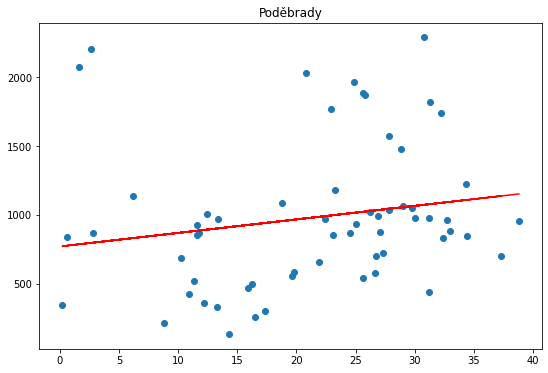

Koeficient determinace: 0.034


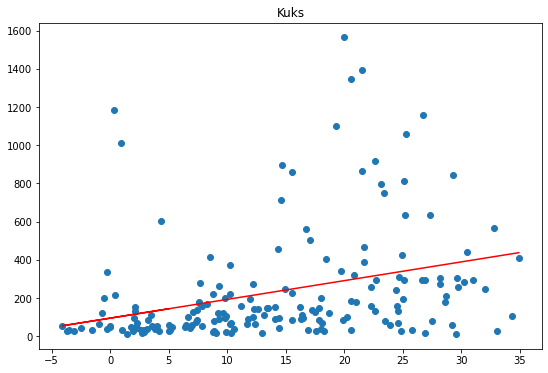

Koeficient determinace: 0.106


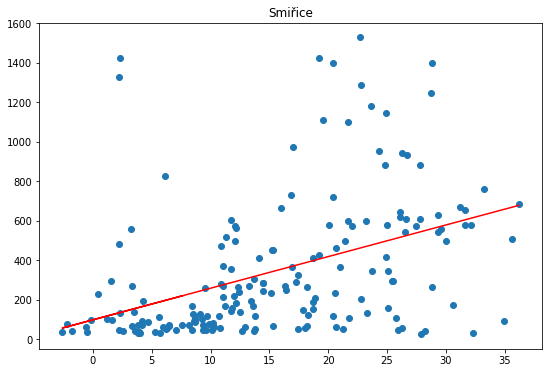

Koeficient determinace: 0.182


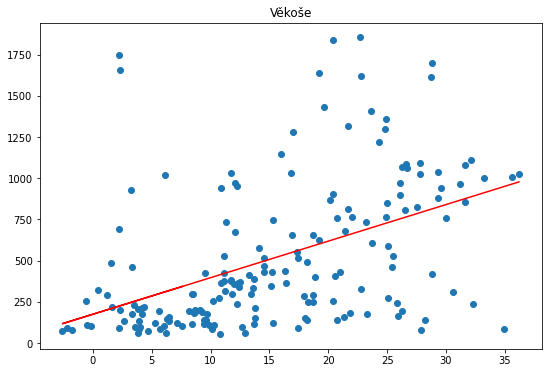

Koeficient determinace: 0.222


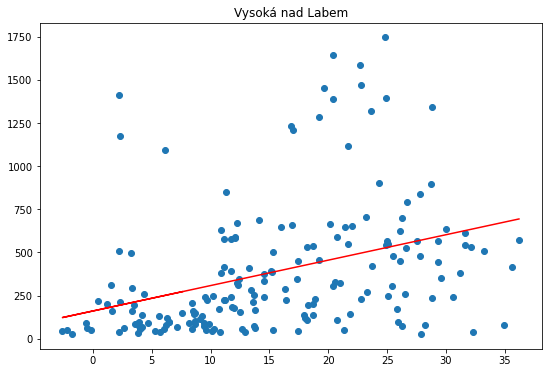

Koeficient determinace: 0.132


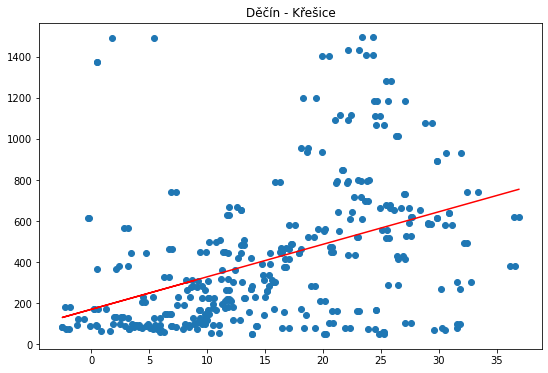

Koeficient determinace: 0.18


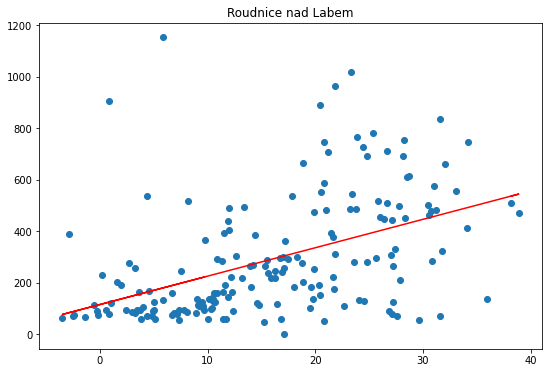

Koeficient determinace: 0.222


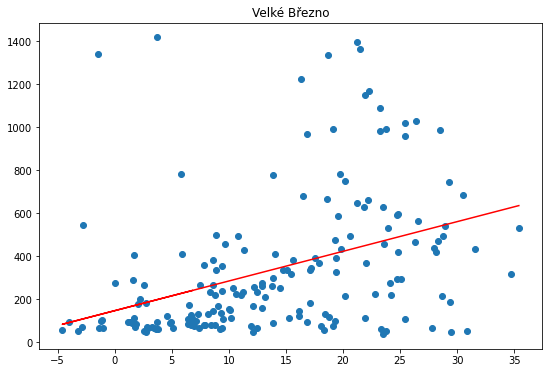

Koeficient determinace: 0.157


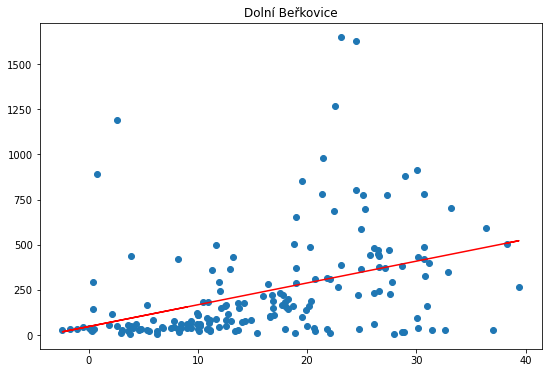

Koeficient determinace: 0.161


In [19]:
seznam = dataset_lc['nazev_citace'].unique()
seznam
for nazev in seznam:
    scitac_lc = dataset_lc[dataset_lc['nazev_citace']== nazev]
    scitac_lc_2019 = scitac_lc[(scitac_lc['datum'] >= '2019-01-01') & (scitac_lc['datum'] <= '2019-06-30')]
    y_lc = scitac_lc_2019.iloc[:, 5].values
    if len(y_lc) < 1:
        continue
    X_lc = scitac_lc_2019.iloc[:, -3].values
    X_lc = X_lc.reshape(-1, 1)
    model = LinearRegression().fit(X_lc, y_lc)
    r_sq = model.score(X_lc, y_lc)
    y_lc_pred = model.predict(X_lc)
    plt.figure(figsize=(9, 6))
    plt.scatter(X_lc, y_lc)
    plt.plot(X_lc, y_lc_pred, color='red')
    plt.title(nazev)
    plt.show()
    print('Koeficient determinace:', round(r_sq, 3))
    

### Zobrazení regresí u sčítačů Labské cyklostezky za první pololetí 2020

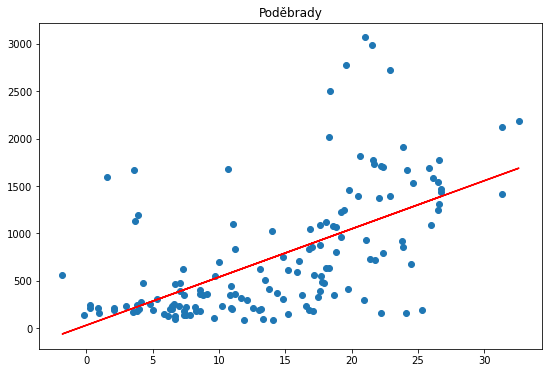

Koeficient determinace: 0.351


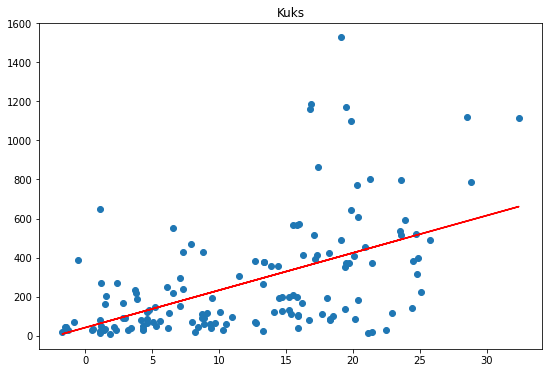

Koeficient determinace: 0.278


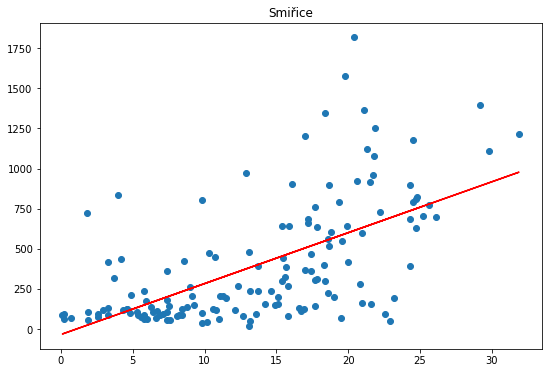

Koeficient determinace: 0.374


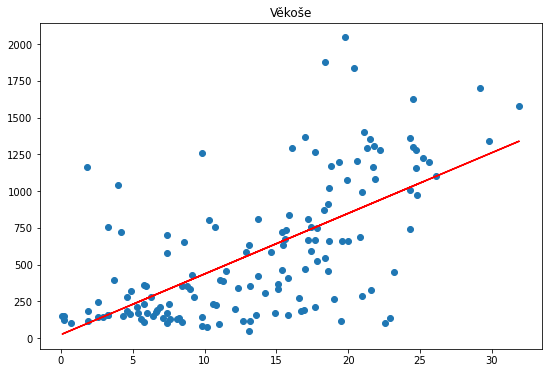

Koeficient determinace: 0.414


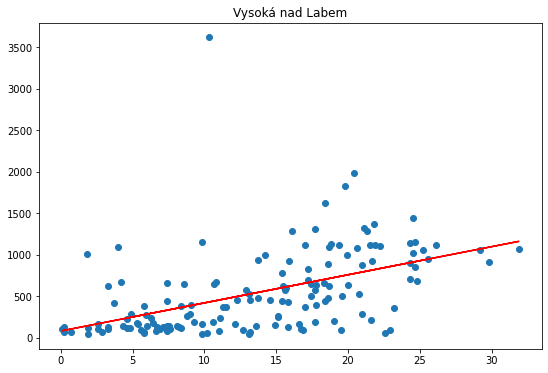

Koeficient determinace: 0.244


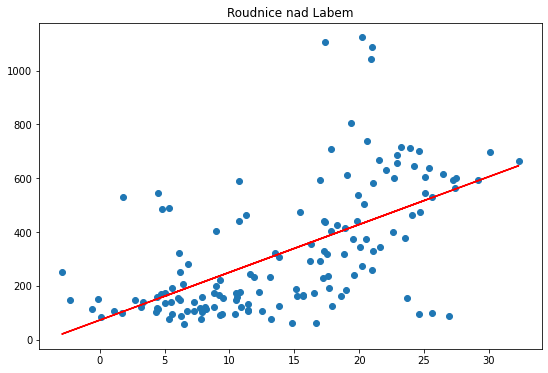

Koeficient determinace: 0.343


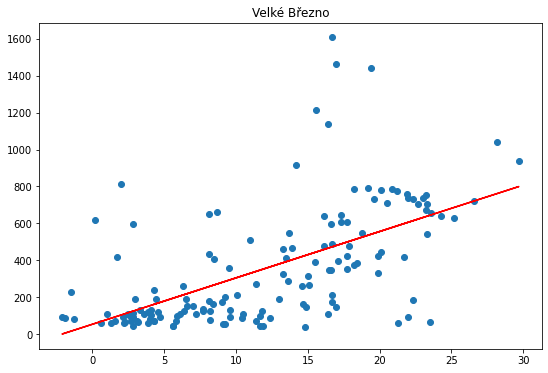

Koeficient determinace: 0.349


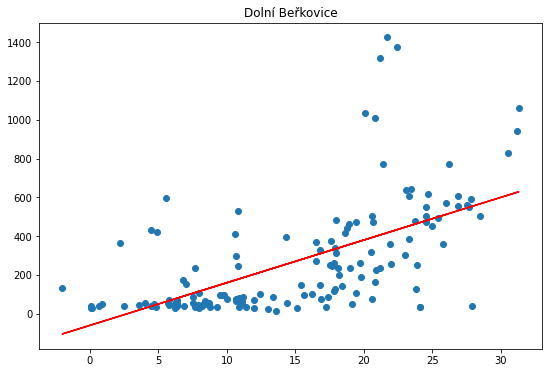

Koeficient determinace: 0.365


In [16]:
seznam = dataset_lc['nazev_citace'].unique()
seznam
for nazev in seznam:
    scitac_lc = dataset_lc[dataset_lc['nazev_citace']== nazev]
    scitac_lc_2020 = scitac_lc[scitac_lc['datum'] >= '2020-01-01']
    y_lc = scitac_lc_2020.iloc[:, 5].values
    if len(y_lc) < 1:
        continue
    X_lc = scitac_lc_2020.iloc[:, -3].values
    X_lc = X_lc.reshape(-1, 1)
    model = LinearRegression().fit(X_lc, y_lc)
    r_sq_lc = model.score(X_lc, y_lc)
    y_lc_pred = model.predict(X_lc)
    plt.figure(figsize=(9, 6))
    plt.scatter(X_lc, y_lc)
    plt.plot(X_lc, y_lc_pred, color='red')
    plt.title(nazev)
    plt.show()
    print('Koeficient determinace:', round(r_sq_lc, 3))
    
    

### Zobrazení regresí u sčítačů cyklostezky Brno-Vídeň za první pololetí 2019

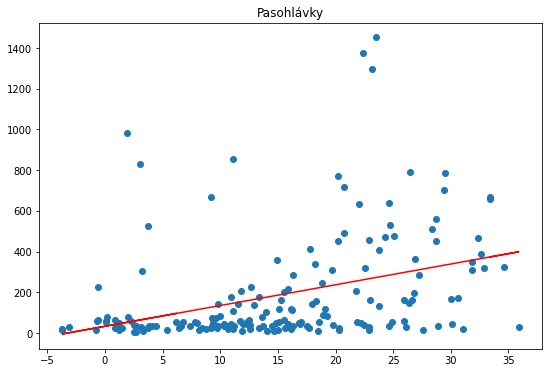

Koeficient determinace: 0.135


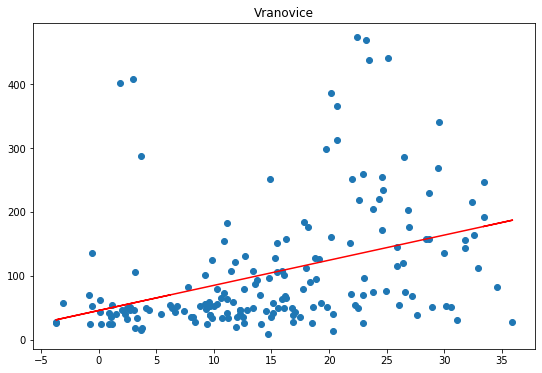

Koeficient determinace: 0.143


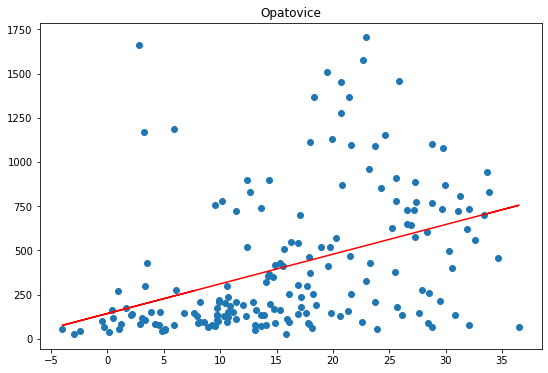

Koeficient determinace: 0.159


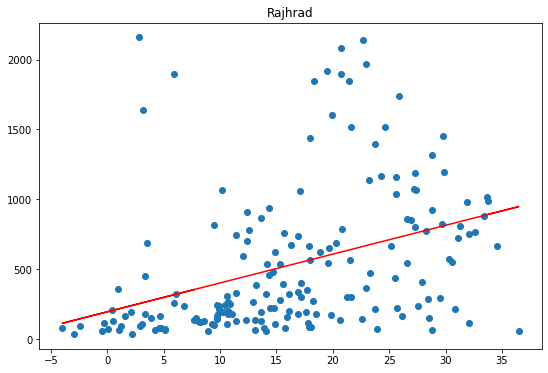

Koeficient determinace: 0.142


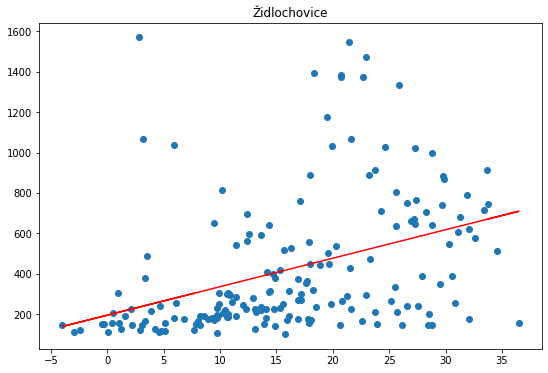

Koeficient determinace: 0.154


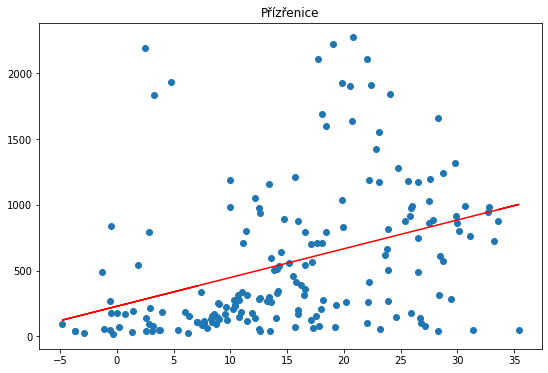

Koeficient determinace: 0.139


In [20]:
seznam = dataset_bvu['nazev_citace'].unique()
for nazev in seznam:
    scitac_bvu = dataset_bvu[dataset_bvu['nazev_citace']== nazev]
    scitac_bvu_2019 = scitac_bvu[(scitac_bvu['datum'] >= '2019-01-01') & (scitac_bvu['datum'] <= '2019-06-30')]
    y_bvu = scitac_bvu_2019.iloc[:, 5].values 
    X_bvu = scitac_bvu_2019.iloc[:, -3].values
    X_bvu = X_bvu.reshape(-1, 1)
    model = LinearRegression().fit(X_bvu, y_bvu)
    r_sq_bvu = model.score(X_bvu, y_bvu)
    y_bvu_pred = model.predict(X_bvu)
    plt.figure(figsize=(9, 6))
    plt.scatter(X_bvu, y_bvu)
    plt.plot(X_bvu, y_bvu_pred, color='red')
    plt.title(nazev)
    plt.show()
    print('Koeficient determinace:', round(r_sq_bvu, 3))

### Zobrazení regresí u sčítačů cyklostezky Brno-Vídeň za první pololetí 2020

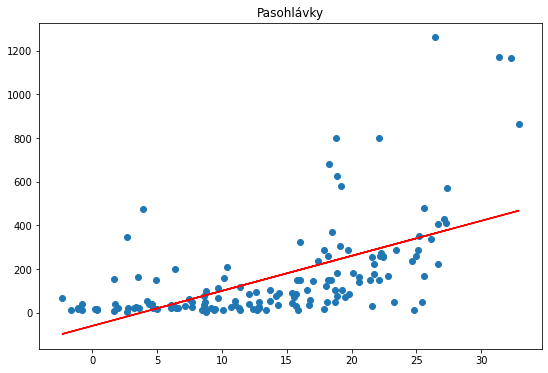

Koeficient determinace: 0.336


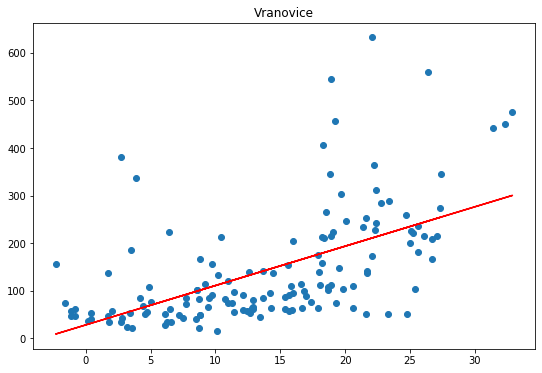

Koeficient determinace: 0.321


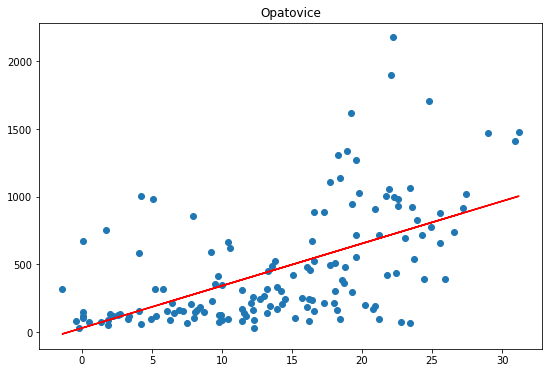

Koeficient determinace: 0.319


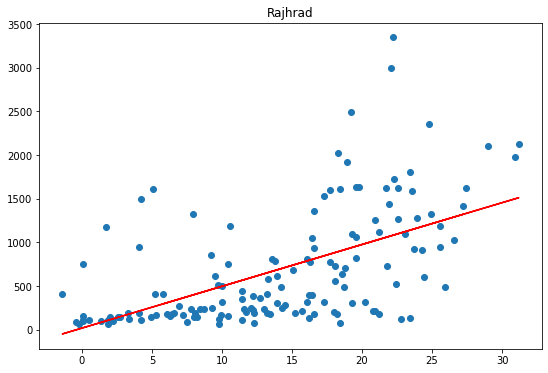

Koeficient determinace: 0.321


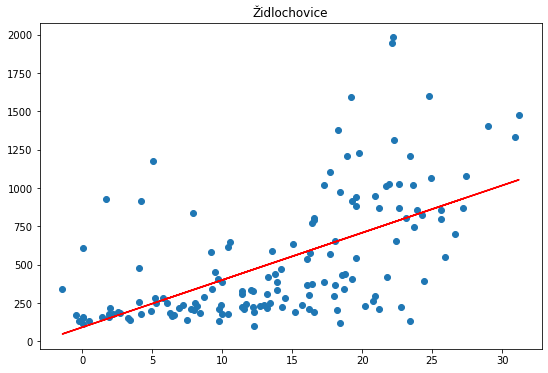

Koeficient determinace: 0.35


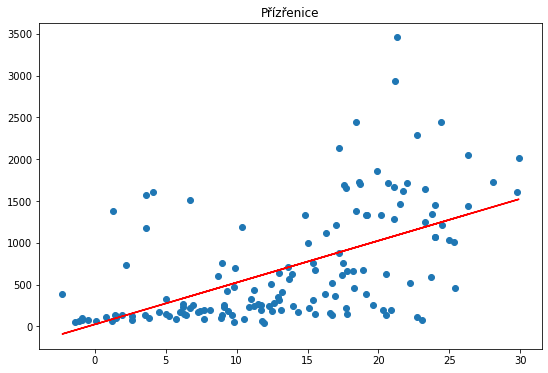

Koeficient determinace: 0.314


In [21]:
seznam = dataset_bvu['nazev_citace'].unique()
for nazev in seznam:
    scitac_bvu = dataset_bvu[dataset_bvu['nazev_citace']== nazev]
    scitac_bvu_2020 = scitac_bvu[scitac_bvu['datum'] >= '2020-01-01']
    y_bvu = scitac_bvu_2020.iloc[:, 5].values 
    X_bvu = scitac_bvu_2020.iloc[:, -3].values
    X_bvu = X_bvu.reshape(-1, 1)
    model = LinearRegression().fit(X_bvu, y_bvu)
    r_sq_bvu = model.score(X_bvu, y_bvu)
    y_bvu_pred = model.predict(X_bvu)
    plt.figure(figsize=(9, 6))
    plt.scatter(X_bvu, y_bvu)
    plt.plot(X_bvu, y_bvu_pred, color='red')
    plt.title(nazev)
    plt.show()
    print('Koeficient determinace:', round(r_sq_bvu, 3))